In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import re
import statistics


def present(directory):
    
    global avg_scores 
    global max_scores
    global no_solutions
#     avg_scores = [[]]
#     max_scores = [[]]
#     no_solutions = [[]]
    avg_scores, max_scores, no_solutions = [[]], [[]], [[]]
    
    # access all folders in this dir
    for folder in os.listdir(directory + "/"):
        print("in folder: " + folder)
        for filename in os.listdir(directory + "/" + folder + "/"):
            if filename.startswith("archive"):
                i = int(re.search('archive_(.*).dat', filename).group(1))
                i = int(i / 50) + 1 # add 1 because we can have an archive as 'archive_0.dat'
                
                while(len(avg_scores) < i):
                    avg_scores.append([])
                while(len(max_scores) < i):
                    max_scores.append([])
                while(len(no_solutions) < i):
                    no_solutions.append([])
                    
                k,_,_,_,_,_,_,z,_,_,_,_,x,y,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_ = np.loadtxt(directory + "/" + folder + "/" + filename, unpack=True)
                avg_scores[i-1].append(statistics.mean(z))
                max_scores[i-1].append(max(z))
                no_solutions[i-1].append(len(z))
                
    fig = plt.figure(figsize=(14,5))
    axes = fig.add_axes([0.1,0.1,0.8,0.8])
    axes.boxplot(avg_scores)
    plt.ylabel("avg covered distance")
    plt.xlabel("generation/50")
    plt.savefig(directory + "/avgscore.pdf")
    plt.show()

    fig = plt.figure(figsize=(14,5))
    axes = fig.add_axes([0.1,0.1,0.8,0.8])
    axes.boxplot(max_scores)
    plt.ylabel("max covered distance")
    plt.xlabel("generation/50")
    plt.savefig(directory + "/maxscore.pdf")
    plt.show()

    fig = plt.figure(figsize=(20,5))
    axes = fig.add_axes([0.1,0.1,0.8,0.8])
    axes.boxplot(no_solutions)
    plt.ylabel("no solutions")
    plt.xlabel("generation/50")
    plt.savefig(directory + "/numsolutions.pdf")
    plt.show()


in folder: rhex_text_2019-07-19_17_05_28_2553
in folder: rhex_text_2019-07-19_17_49_54_2237
in folder: rhex_text_2019-07-19_17_18_39_14139
in folder: rhex_text_2019-07-19_16_14_07_19388
in folder: rhex_text_2019-07-19_15_22_31_12850


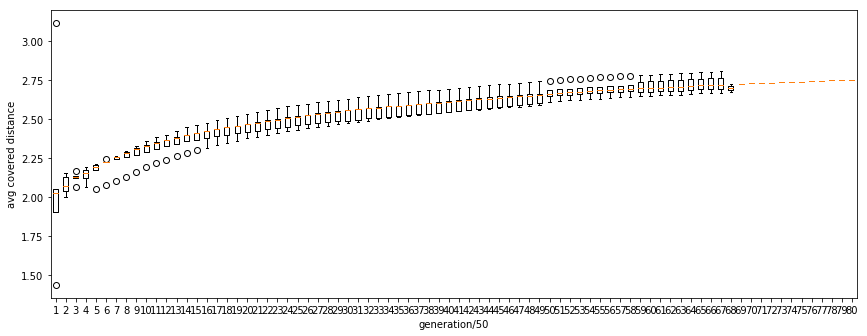

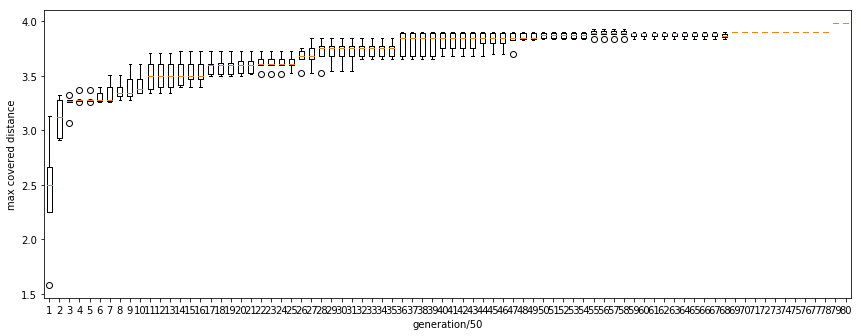

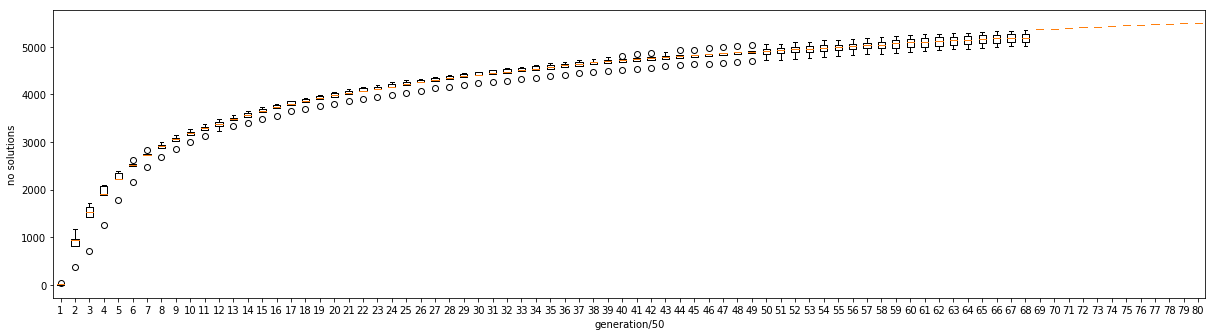

In [8]:
present("2307")